In [1]:
from __future__ import print_function, division, absolute_import

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.io.ascii as at
import astropy.units as u
from scipy.interpolate import interp1d

In [2]:
import astroplan
astroplan.__version__


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]

>>> from astroplan import download_IERS_A
>>> download_IERS_A()



u'0.4'

In [3]:
from astroplan import Observer,FixedTarget,ObservingBlock
from astroplan.constraints import AtNightConstraint, AirmassConstraint
from astroplan.constraints import TimeConstraint, MoonSeparationConstraint
from astroplan.scheduling import Transitioner,SequentialScheduler,Schedule
from astropy.time import Time
from astroplan.plots import plot_schedule_airmass

In [40]:
kpno = Observer.at_site('kpno')

In [33]:
praesepe = FixedTarget.from_name("Praesepe")

130d06m00s


In [35]:
print(praesepe.ra.to(u.hourangle),praesepe.dec)

8h40m24s 19d40m00.12s


In [52]:
from astropy.time import Time
noon_before = Time('2017-12-11 19:00:01')
noon_after = Time('2017-12-12 19:00:01')

In [75]:
constraints = [AirmassConstraint(max=2,boolean_constraint=True),
                      AtNightConstraint.twilight_civil(),
                      MoonSeparationConstraint(min=60*u.degree),
                      TimeConstraint(noon_before,noon_after)]

In [76]:
from astroplan.utils import time_grid_from_range
# Create grid of times from ``start_time`` to ``end_time``
# with resolution ``time_resolution``
time_resolution = 1 * u.hour
time_grid = time_grid_from_range([noon_before,noon_after],
                                 time_resolution=time_resolution)

In [77]:
observability_grid = np.zeros((len(constraints), len(time_grid)),bool)

for i, constraint in enumerate(constraints):
    # Evaluate each constraint
    observability_grid[i, :] = constraint(kpno, praesepe, times=time_grid)
print(np.shape(observability_grid))
print(observability_grid)

(4, 24)
[[False False False False False False False False False False False False
   True  True  True  True  True  True  True  True  True False False False]
 [False False False False False False  True  True  True  True  True  True
   True  True  True  True  True  True  True False False False False False]
 [False  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True]]


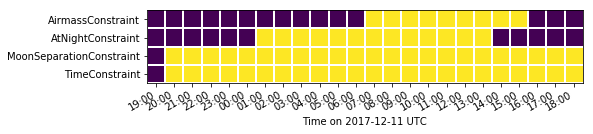

In [78]:
# Create plot showing observability of the target:

nc = len(constraints)

extent = [-0.5, -0.5+len(time_grid), -0.5, nc-0.5]

fig, ax = plt.subplots(figsize=(11,6))
ax.imshow(observability_grid, extent=extent)

ax.set_yticks(range(0, nc))
ax.set_yticklabels([c.__class__.__name__ for c in constraints[::-1]])

ax.set_xticks(range(len(time_grid)))
ax.set_xticklabels([t.datetime.strftime("%H:%M") for t in time_grid])

ax.set_xticks(np.arange(extent[0], extent[1]), minor=True)
ax.set_yticks(np.arange(extent[2], extent[3]), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
ax.tick_params(axis='x', which='minor', bottom='off')
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

ax.tick_params(axis='y', which='minor', left='off')
ax.set_xlabel('Time on {0} UTC'.format(time_grid[0].datetime.date()))
fig.subplots_adjust(left=0.35, right=0.9, top=0.9, bottom=0.1)
plt.show()

In [79]:
observability = np.sum(observability_grid,axis=0)==nc
print(observability)

[False False False False False False False False False False False False
  True  True  True  True  True  True  True False False False False False]


In [80]:
hours_observable = len(np.where(observability)[0])
print(hours_observable)

7
